## Importando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importação da database e análise inicial

In [3]:
db = pd.read_csv(r"D:\Users\JOSUEH HENRIQUE\Downloads\desafio_indicium_imdb.csv")

In [4]:
db.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
db.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [7]:
db.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
db.nunique()

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

## Tratamento dos dados
Aqui acontece o tratamento mais básico dos dados da tabela

In [34]:
# Aqui transformaremos a tabela de faturamento em int.
db['Gross'] = db['Gross'].str.replace(',', '').astype(float)
db['Runtime'] = db['Runtime'].str.replace('min', '').astype(int)
print(db['Gross'].head(1))
print(db['Runtime'].head(1))

AttributeError: Can only use .str accessor with string values!

## Começaremos a trabalhar nos dados

Faremos relações que formulem hipóteses e tentem solucionar os problemas propostos:
1. Qual filme você recomendaria para uma pessoa que você não conhece?
2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>,
        <Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>,
        <Axes: title={'center': 'Runtime'}>]], dtype=object)

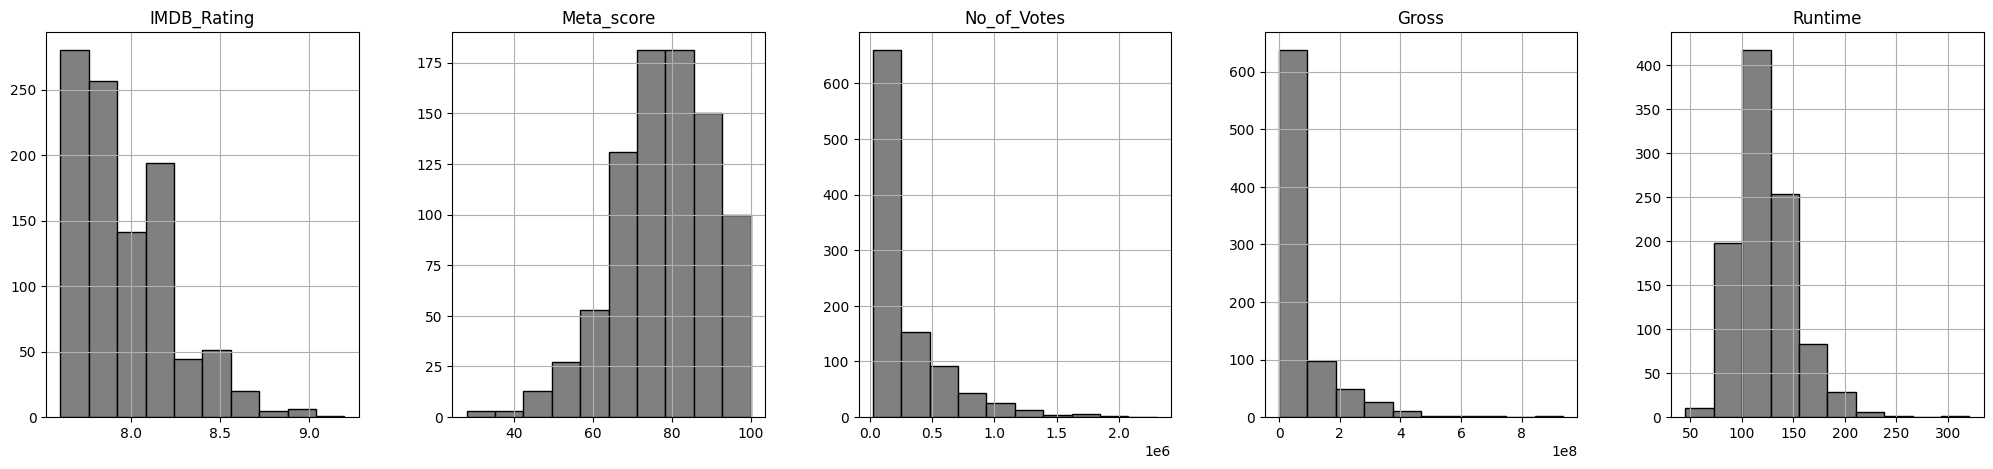

In [16]:
calculable = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
db[calculable].hist(figsize = (25, 5), color = 'grey', edgecolor = 'black', layout = (1, 5))

In [ ]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = db['Genre'][:10], y = db['No_of_Votes'][:10], color = 'grey', edgecolor = 'black')
plt.show()

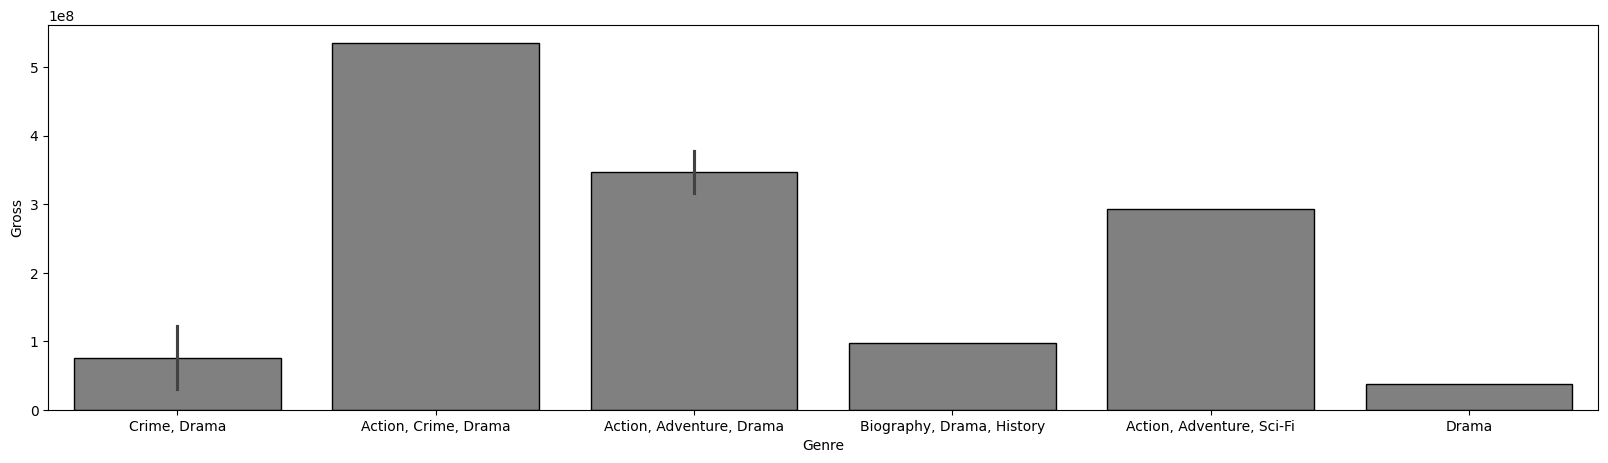

In [11]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = db['Genre'][:10], y = db['Gross'][:10], color = 'grey', edgecolor = 'black')
plt.show()

Temos que encontrar um filme para uma pessoa desconhecida, para isso podemos filtrar alguns dos que mais tiveram votos, logo uns dos que mais foram relevantes ao público.

In [12]:
top_voted = db.sort_values(['No_of_Votes'], ascending = False)

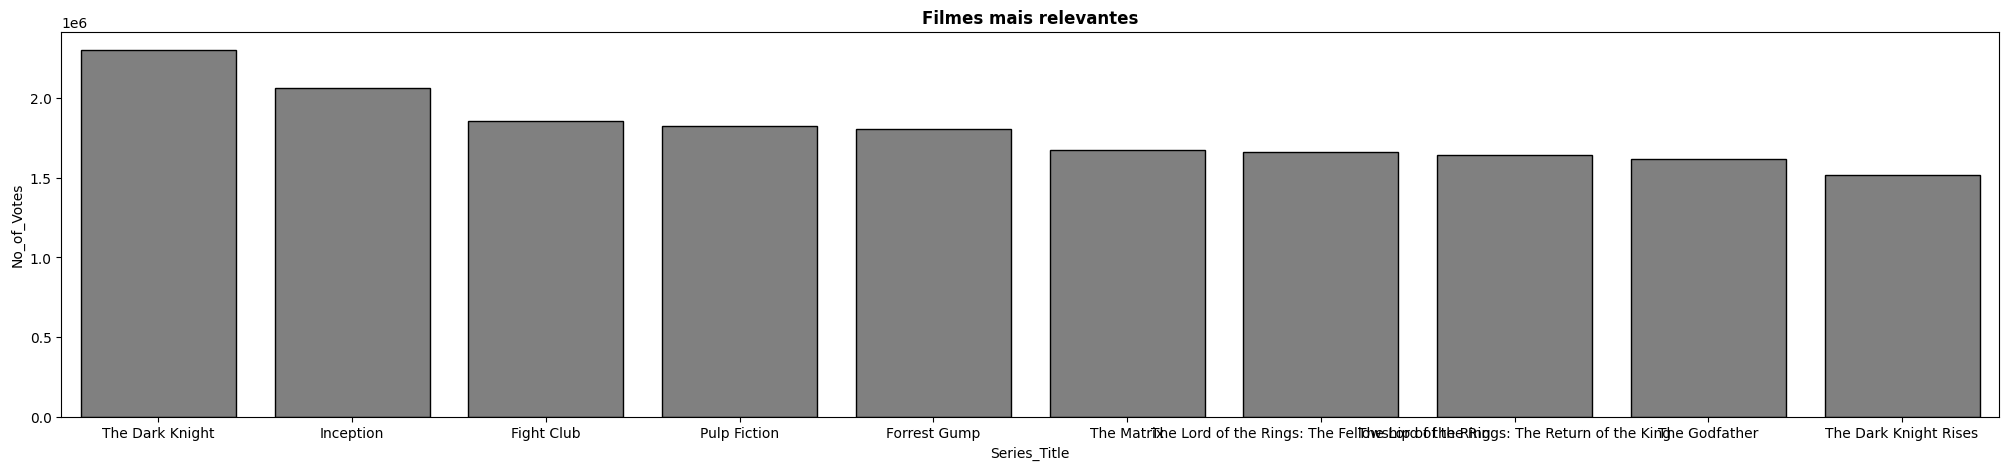

In [13]:
fig,axs = plt.subplots(figsize=(25,5))
z = sns.barplot(x=top_voted['Series_Title'][:10],y = top_voted['No_of_Votes'][:10], color = 'grey', edgecolor = 'black')
z.set_title("Filmes mais relevantes", weight = "bold")
plt.show()

Podemos trabalhar agora com essa amostra, vamos ver qual desses desempenharam melhor, e de maneira mais consistente nas notas.

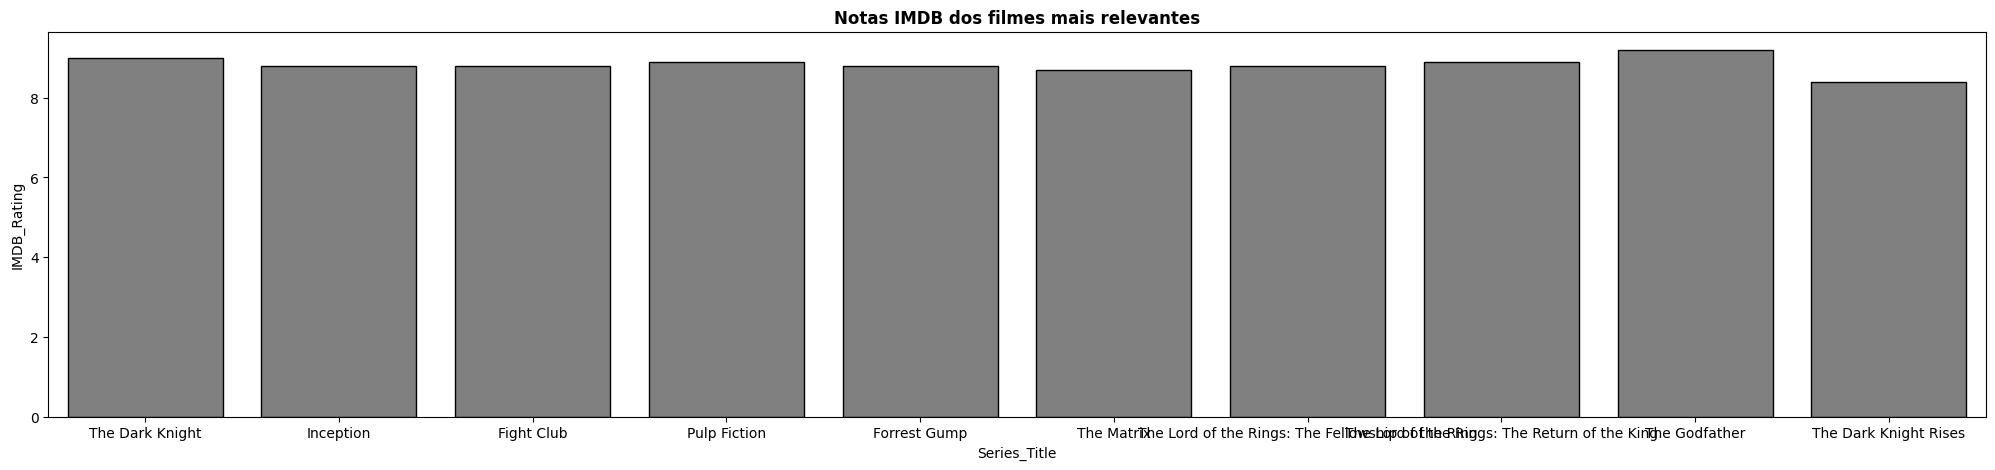

In [14]:
fig,axs = plt.subplots(figsize = (25,5))
z = sns.barplot(x=top_voted['Series_Title'][:10],y = top_voted['IMDB_Rating'][:10], color = 'grey', edgecolor = 'black')
z.set_title("Notas IMDB dos filmes mais relevantes", weight = "bold")
plt.show()

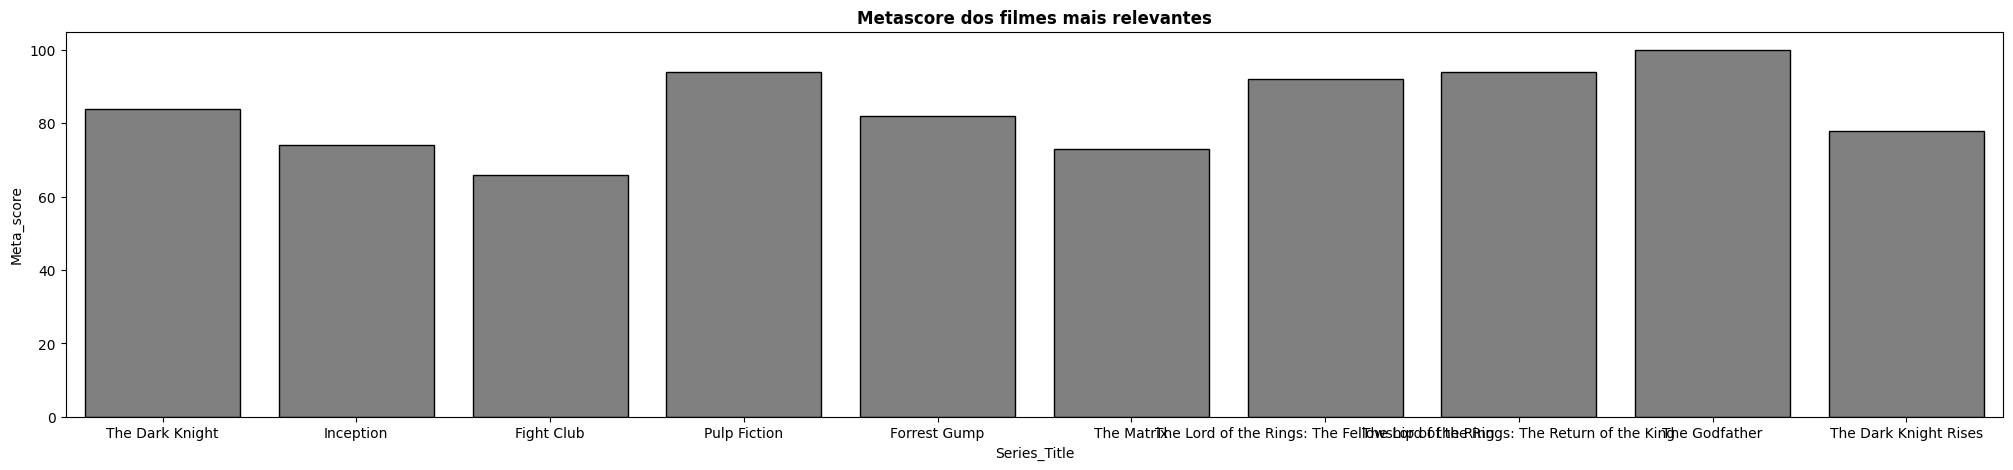

In [15]:
fig,axs = plt.subplots(figsize=(25,5))
g = sns.barplot(x=top_voted['Series_Title'][:10],y = top_voted['Meta_score'][:10], color = 'grey', edgecolor = 'black')
g.set_title("Metascore dos filmes mais relevantes", weight = "bold")
plt.show()

Apesar de haver certas diferenças, todos desempenham de maneira parecida. Vamos adicionar os fatores atores e diretor para a análise.

Faremos um processo semelhante, filtraremos os diretores mais relevantes e após isso como desempenham nas críticas

In [19]:
atores = ['Star1','Star2','Star3','Star4']
diretores = ['Director']

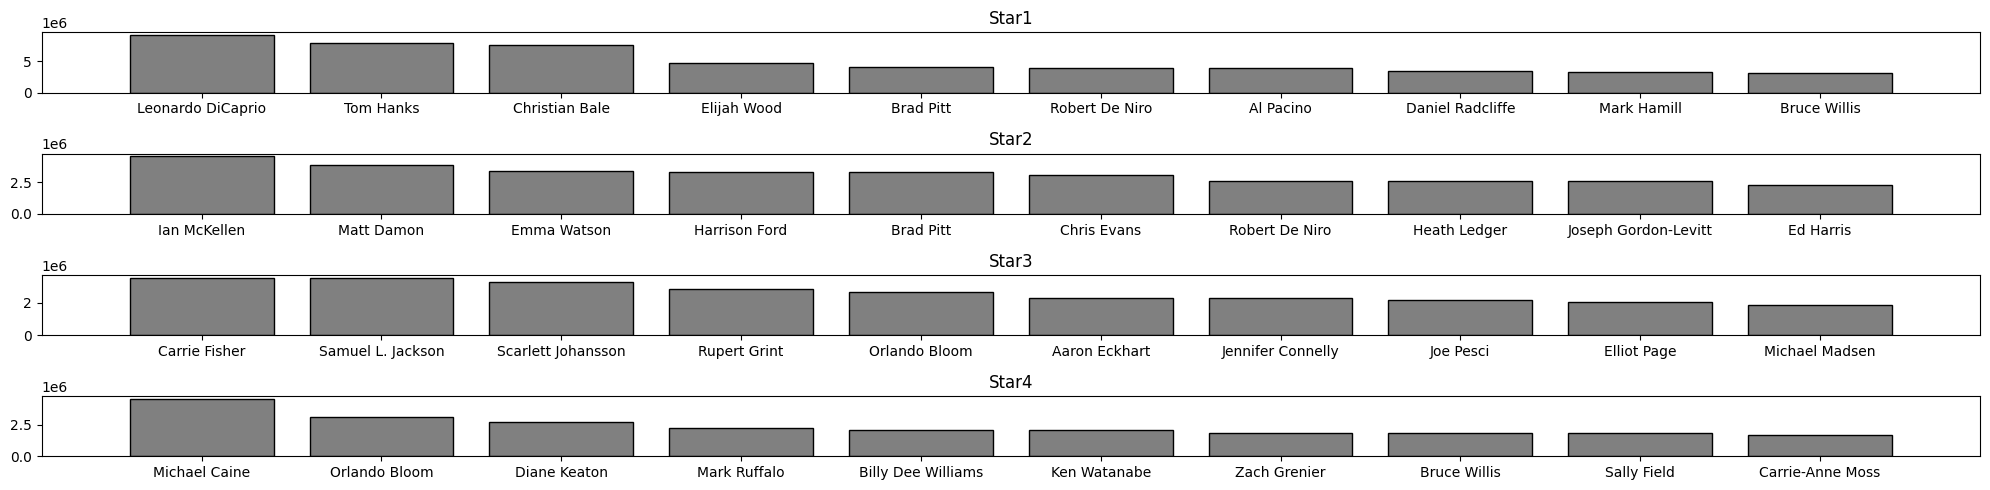

In [41]:
fig,axs = plt.subplots(4,1,figsize = (20,5))
ax = 0
for x in atores:
    s = db.groupby([x]).sum().reset_index()
    d = s.sort_values(['No_of_Votes'], ascending = False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'], color = 'grey', edgecolor = 'black')
    axs[ax].set_title(x)
    ax += 1
    plt.tight_layout()

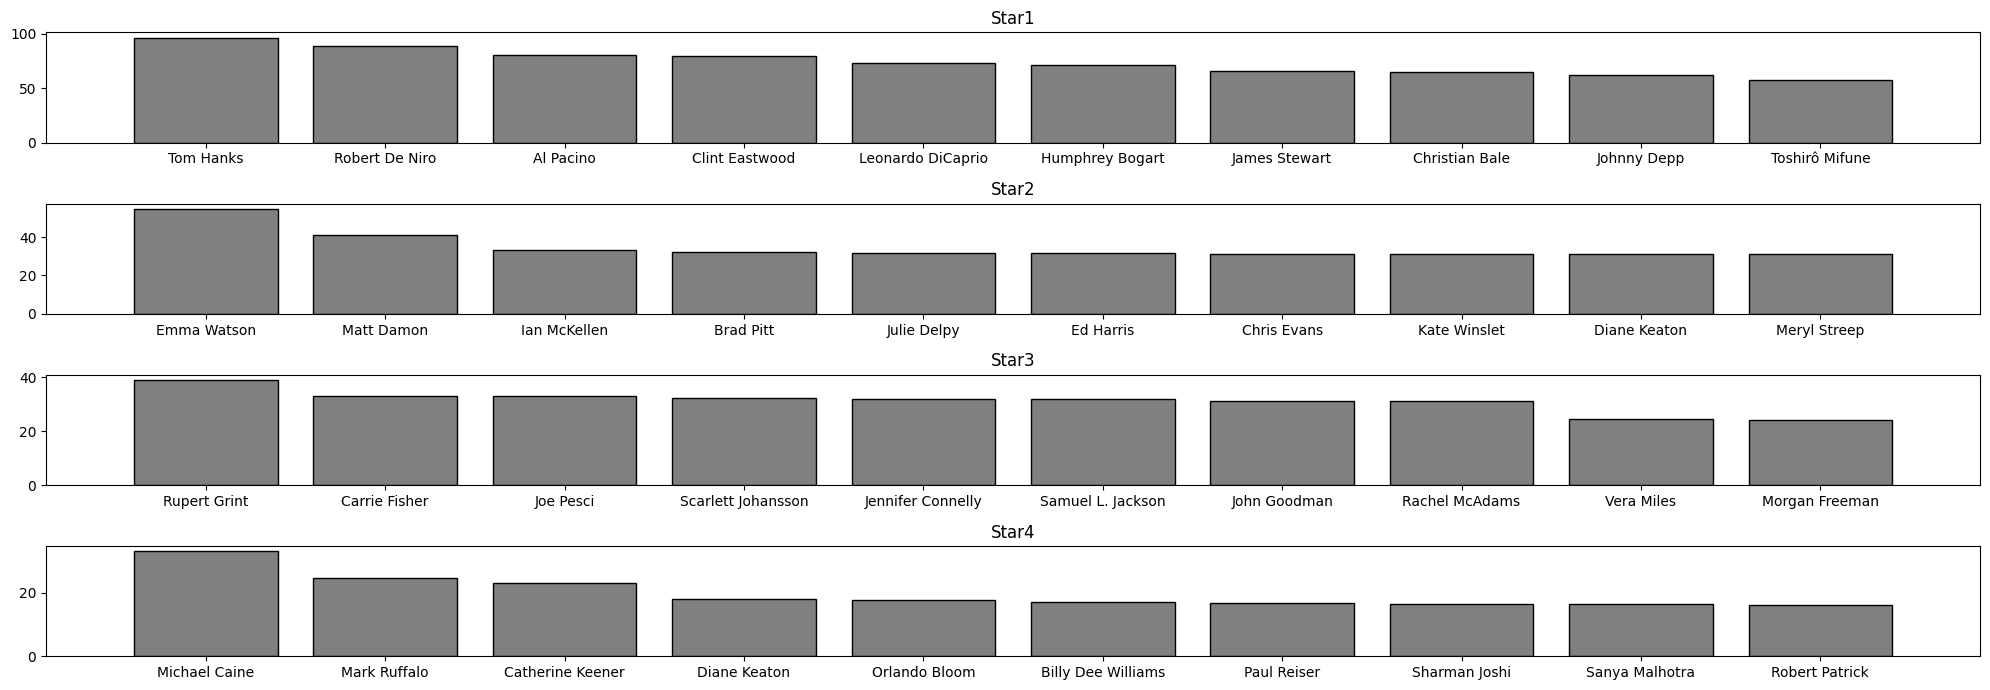

In [21]:
fig,axs = plt.subplots(4,1,figsize=(20,7))
ax = 0
for x in atores:
    s = db.groupby([x]).sum().reset_index()
    d = s.sort_values(['IMDB_Rating'], ascending = False)[:10]
    axs[ax].bar(d[x],d['IMDB_Rating'], color = 'grey', edgecolor = 'black')
    axs[ax].set_title(x)
    ax += 1
    plt.tight_layout()

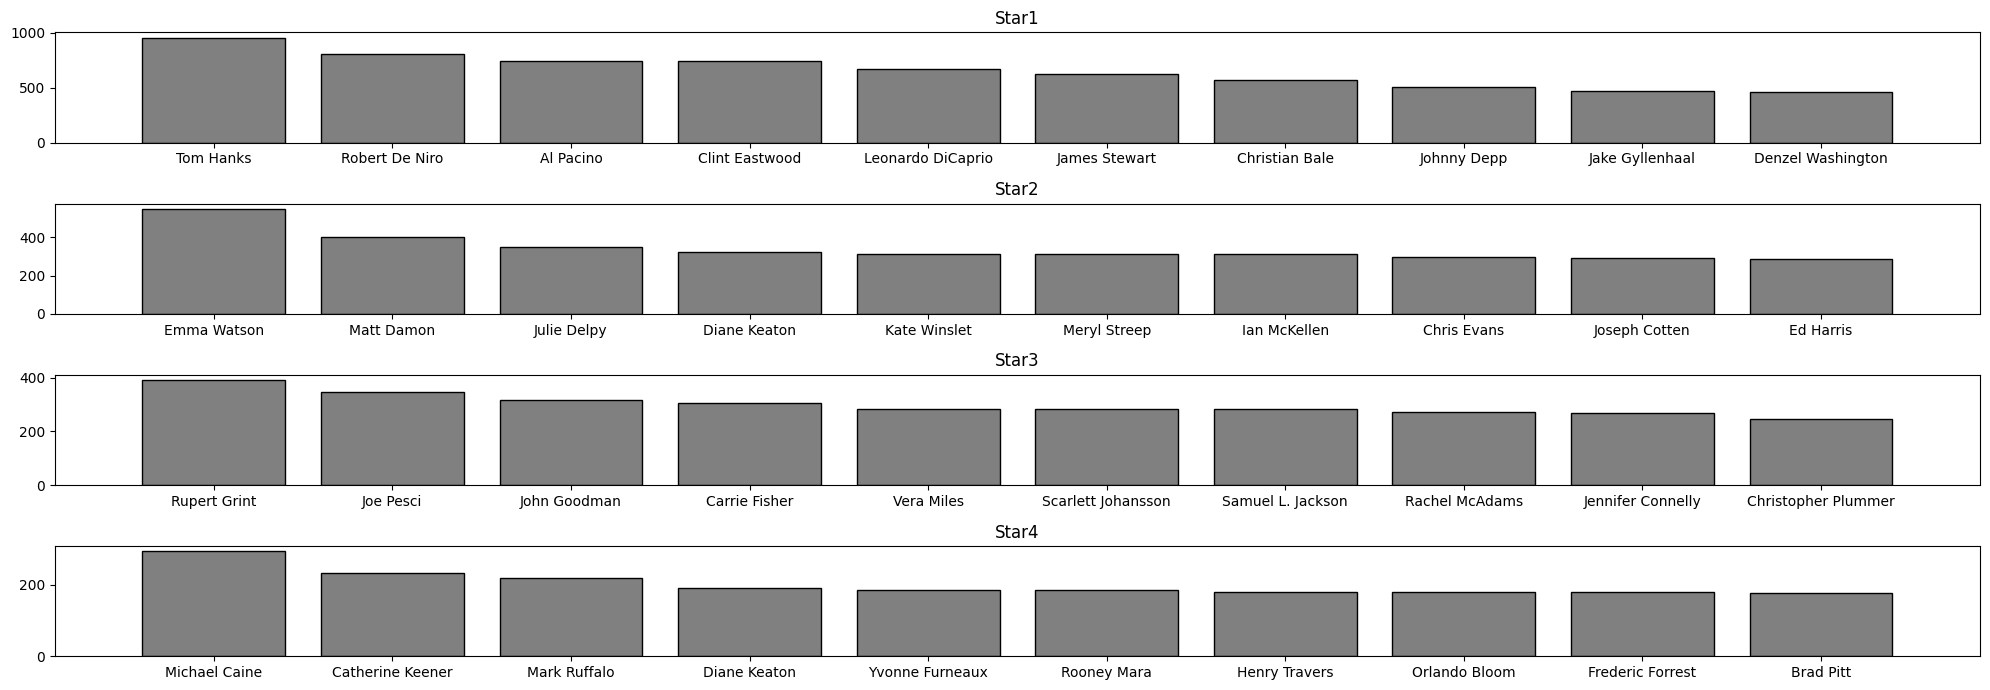

In [22]:
fig,axs = plt.subplots(4,1,figsize = (20,7))
ax = 0
for x in atores:
    s = db.groupby([x]).sum().reset_index()
    d = s.sort_values(['Meta_score'], ascending = False)[:10]
    axs[ax].bar(d[x],d['Meta_score'], color = 'grey', edgecolor = 'black')
    axs[ax].set_title(x)
    ax += 1
    plt.tight_layout()

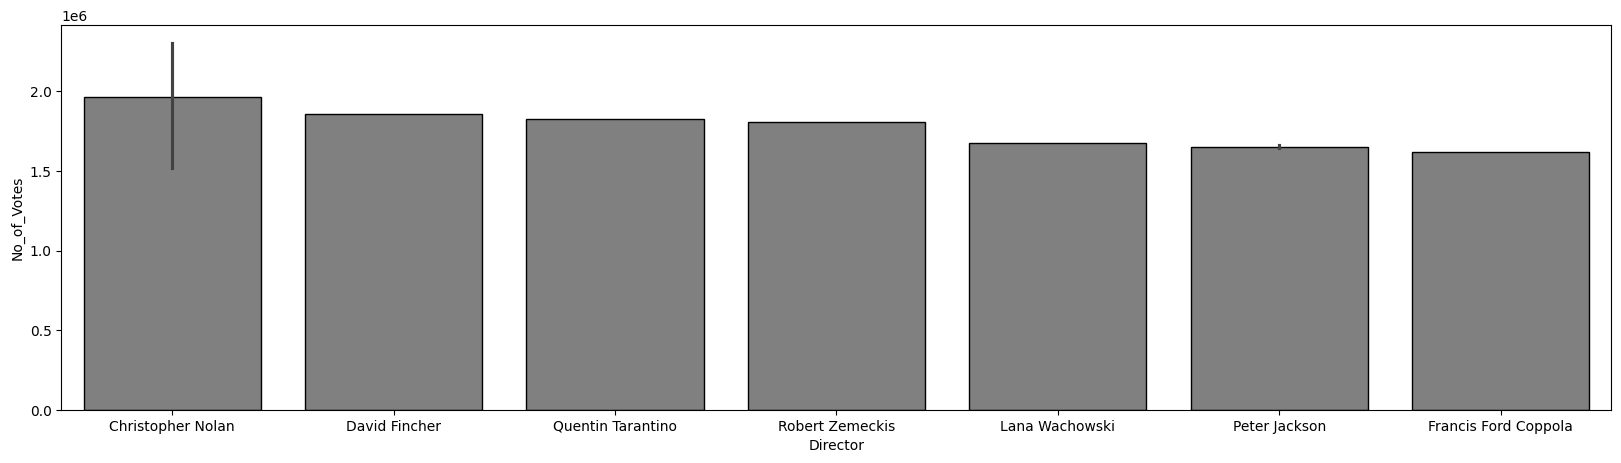

In [23]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = top_voted['Director'][:10], y = top_voted['No_of_Votes'][:10], color = 'grey', edgecolor = 'black')
plt.show()

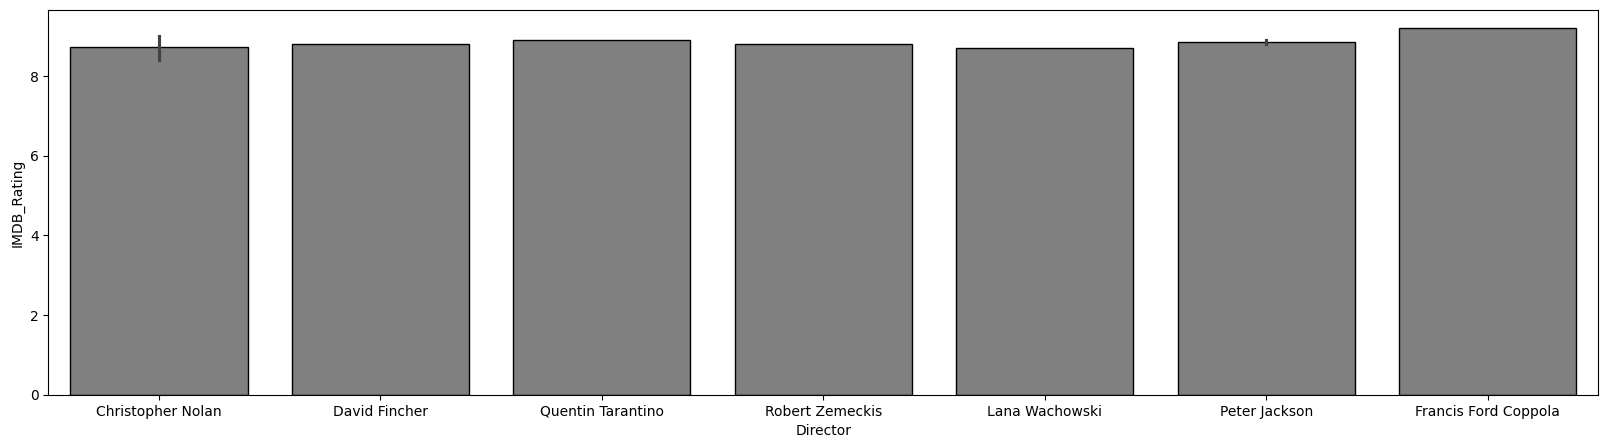

In [24]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = top_voted['Director'][:10], y = top_voted['IMDB_Rating'][:10], color = 'grey', edgecolor = 'black')
plt.show()

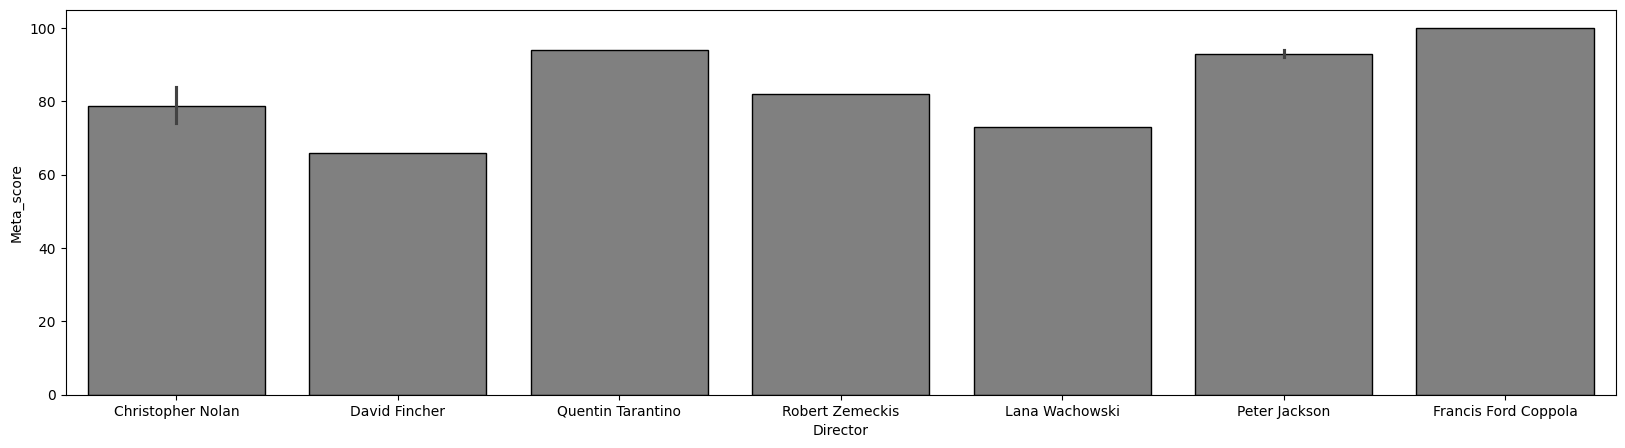

In [25]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = top_voted['Director'][:10], y = top_voted['Meta_score'][:10], color = 'grey', edgecolor = 'black')
plt.show()

Com essas relações podemos concluir algumas coisas:
1. As notas do IMDB e o meta score tendem a não discordar de maneira significativa.
2. Um filme que seria uma segura recomendação é o Dark Knight.

### Justificativas da resposta
1. O filme é relevante.
2. Possui boas notas do público/críticos.
3. Possui um diretor e atores principais relevantes e aclamados.
4. Além de possuir uma excelente combinação de gêneros que é ação, drama e "policial"
> Drama e ação são temas que, inclusive, ocupam o pódio de gêneros mais consumidos desde 1995, segundo o database The Number.

Vamos agora fazer mais algumas associações para responder o segundo problema proposto.
Para isso vamos focar nos faturamentos.

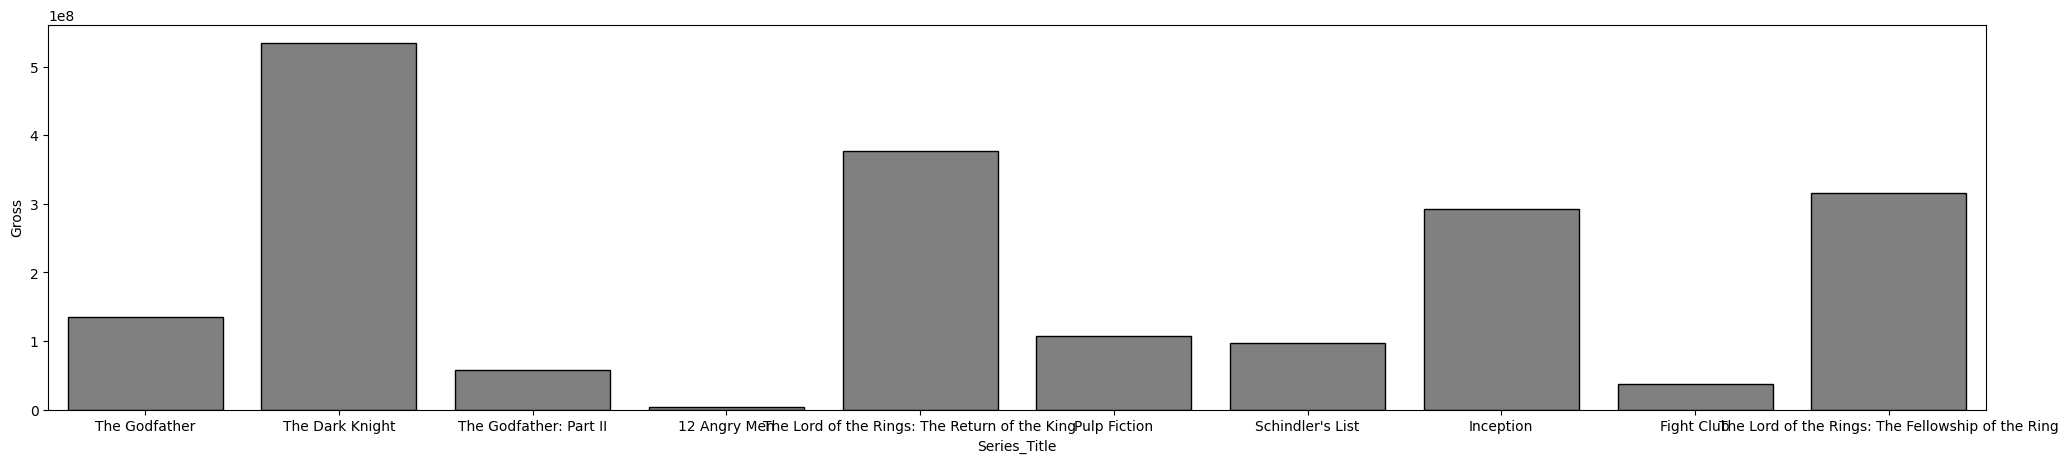

In [26]:
fig,axs = plt.subplots(figsize = (25,5))
g = sns.barplot(x = db['Series_Title'][:10], y = db['Gross'][:10], color = 'grey', edgecolor = 'black')
plt.show()

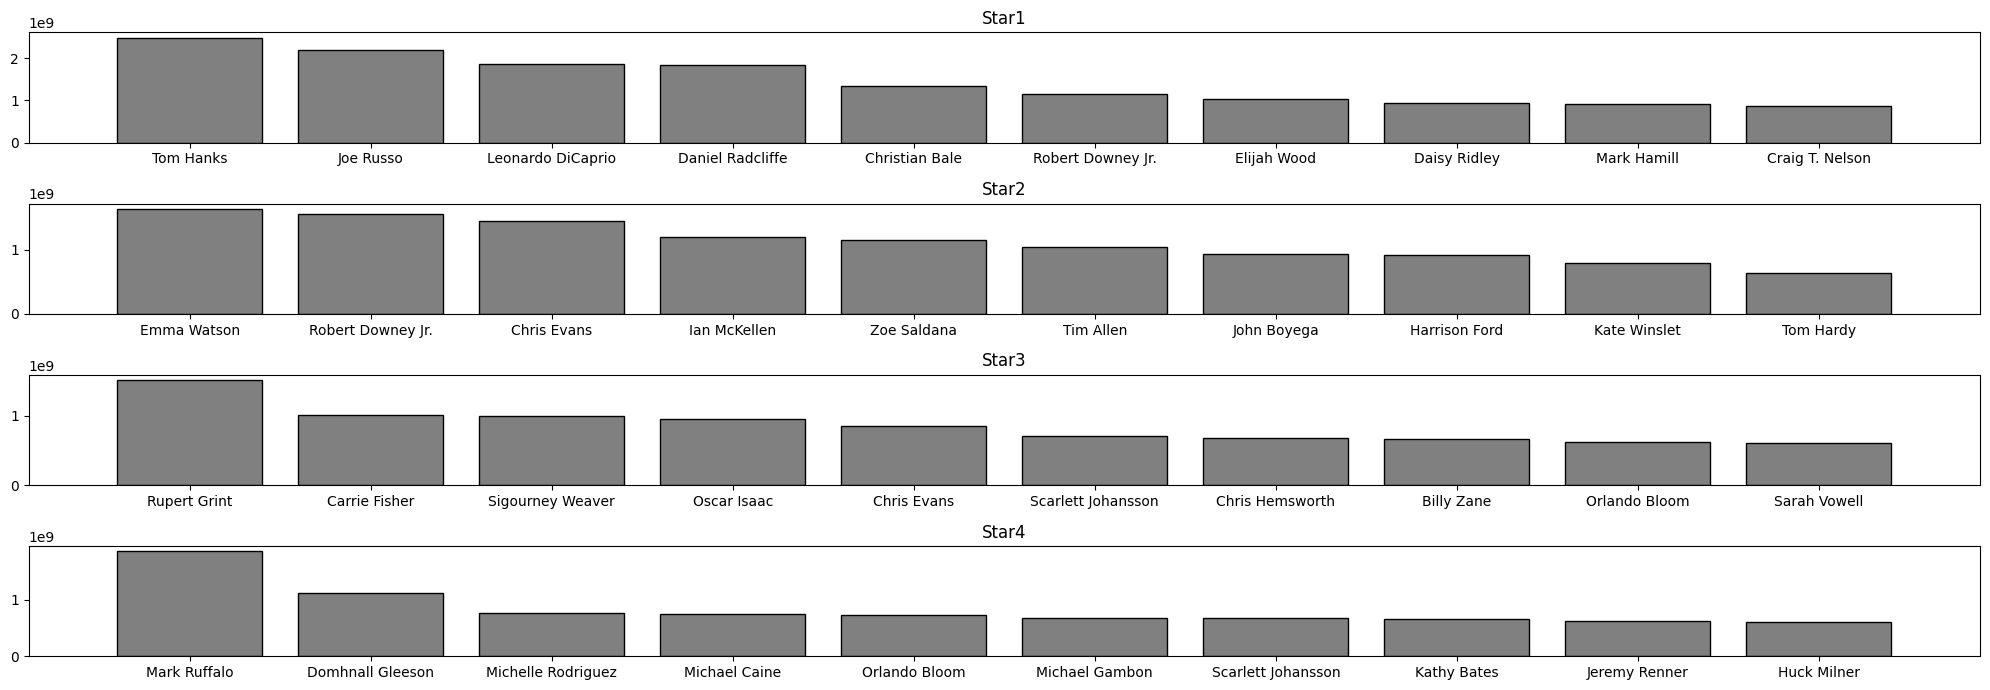

In [27]:
fig,axs = plt.subplots(4,1,figsize=(20,7))
ax = 0
for x in atores:
    s = db.groupby([x]).sum().reset_index()
    d = s.sort_values(['Gross'], ascending = False)[:10]
    axs[ax].bar(d[x],d['Gross'], color = 'grey', edgecolor = 'black')
    axs[ax].set_title(x)
    ax += 1
    plt.tight_layout()

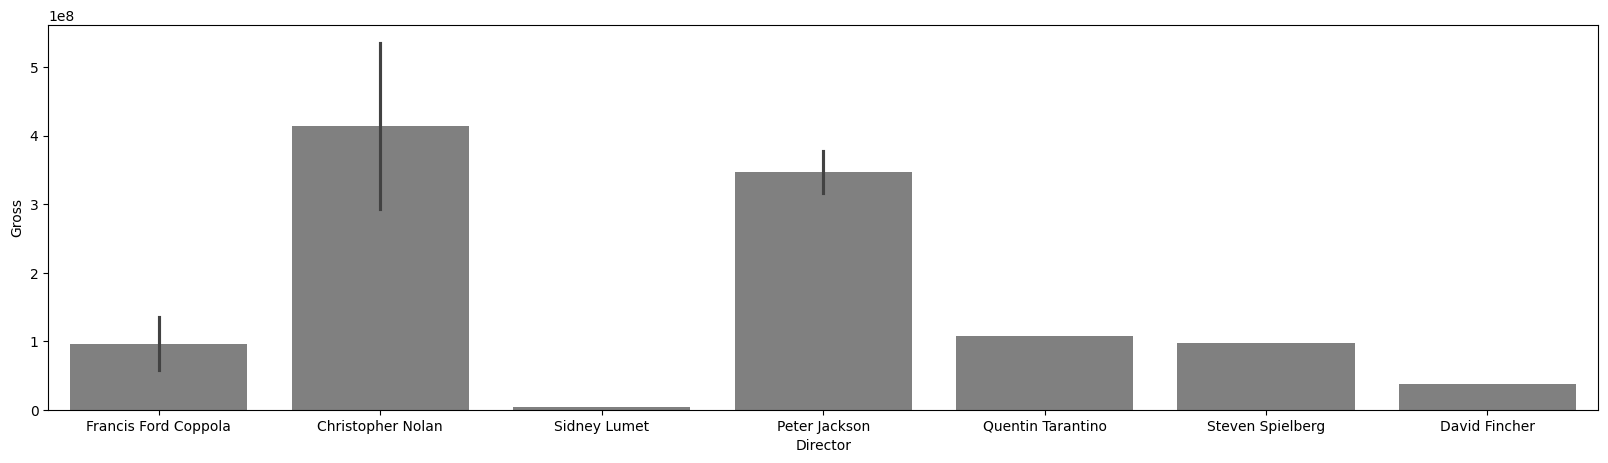

In [36]:
fig,axs = plt.subplots(figsize = (20,5))
g = sns.barplot(x = db['Director'][:10], y = db['Gross'][:10], color = 'grey', edgecolor = 'black')
plt.show()

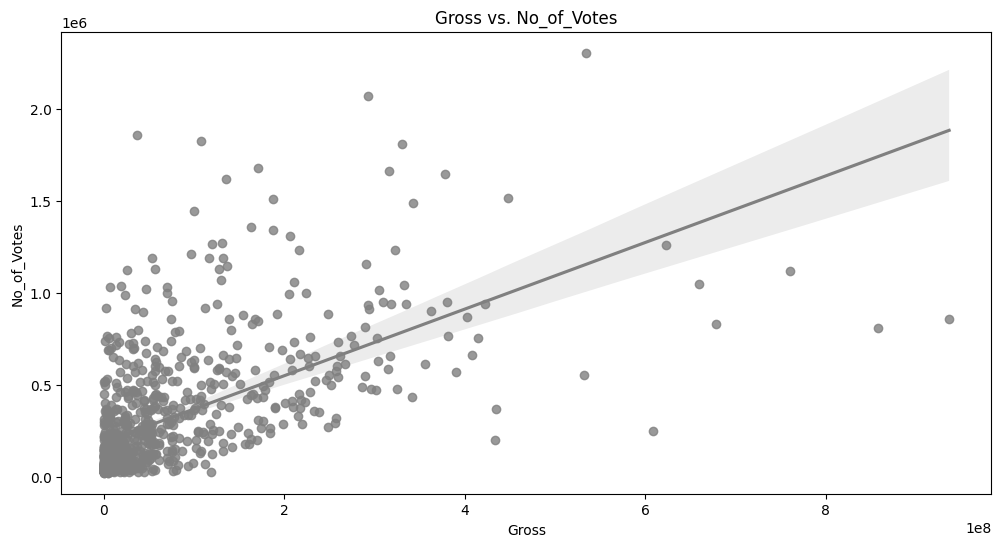

In [40]:
plt.figure(figsize=(12,6))
sns.regplot(x=db['Gross'], y=db['No_of_Votes'], color = 'grey')
plt.title('Gross vs. No_of_Votes')
plt.xlabel('Gross')
plt.ylabel('No_of_Votes')
plt.show()

Com essa rápida pesquisa, junta das relações anteriormente estabelecidas, é possível os fatores que influenciam a expectativa de faturamento de um filme.
### Justificativas da resposta
1. Bons e consagrados atores e diretor.
2. O quanto os gêneros e suas combinações são apelativos ao público.
> A relevância nem sempre quer dizer se um filme teve alto faturamento, esses filmes que continuaram ou ganharam relevância conforme o tempo são os chamados filmes cult.

Para a terceira problemática, é quase impossível para um ser humano aprender a prever o tema e gênero de um filme só utilizando sua sinopse. Porém, é possível com o machine learning.
### Justificativas da resposta
Podemos treinar uma máquina (com um modelo de regressão) para separar um texto em palavras somente e entender palavras-chave de um texto, ela entenderá que aquela palavra costuma aparecer em contextos mais relacionados a tal tema e gênero de um filme, encontrando mais palavras-chave sua tentativa se torna mais precisa. E assim, a máquina continua seu treinamento.